In [13]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras import layers
import keras_tuner as kt
from sklearn.model_selection import train_test_split

#Normalização dos anos
ano = np.array([1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])

ano_media = np.mean(ano)
ano_std = np.sqrt( np.sum((ano - ano_media)**2)/53  )
ano_normalizado = (ano - ano_media)/ano_std




#Dados disponíveis para pesca artesanal
anos_com_dados = np.delete(ano, [0,1,2,3,4,5,6,7,8,21,22,23,24,25,47])
anos_com_dados_norm = np.delete(ano_normalizado, [0,1,2,3,4,5,6,7,8,21,22,23,24,25,47])


pesca_art = np.array([2,8,13,14,3,1,2,12,9,8,2,6,165,2,33.5,5.5,57.5,17,45.5,32,31,35.5,39.5,45,20.5,35.041,7.000,3.728,4.711,11.939,13.802,3.823,0.008,40.428,101.038,89.392,80.211,37.116,42.803])

pa_media = np.mean(pesca_art)
pa_std = np.sqrt( np.sum((pesca_art - pa_media)**2)/38  )
pa_normalizado = (pesca_art - pa_media)/pa_std

#Colocando dados normalizados no formato de entrada da rede
anos_com_dados_norm = anos_com_dados_norm.reshape((39,1))
pa_normalizado = pa_normalizado.reshape((39,1))



#Dados a serem preditos(anos sem pesca artesanal)
anos_sem_pesca_art = np.array([])
aspa_normalizado = np.array([])
for i in [0,1,2,3,4,5,6,7,8,21,22,23,24,25,47]:
    aspa_normalizado = np.append(aspa_normalizado,ano_normalizado[i])
    anos_sem_pesca_art = np.append(anos_sem_pesca_art ,ano[i])

aspa_normalizado = aspa_normalizado.reshape(15,1)


In [ ]:
#Fit do modelo e salvando seus pesos
model = keras.models.load_model('/home/andre/Área de Trabalho/Projeto da pesca/modelo_projeto_pesca.keras') 
history = model.fit(anos_com_dados_norm,pa_normalizado, epochs=500, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Projeto da pesca/Polvos/pesos pesca art/.weights.h5', overwrite=True)

#Loss da rede com os pesos salvos
#Epoch 500/500
#2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: loss: loss: 0.1642  

In [17]:
#Pegando o modelo pesos salvos
model = keras.models.load_model('/home/andre/Área de Trabalho/Projeto da pesca/modelo_projeto_pesca.keras')
model.load_weights('/home/andre/Área de Trabalho/Projeto da pesca/Polvos/pesos pesca art/.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Previsões dos dados ausentes: [[  1.3269882]
 [  2.4013386]
 [  3.4416962]
 [  4.4445515]
 [  5.4395485]
 [  6.4219246]
 [  7.3231373]
 [  8.211149 ]
 [  9.030796 ]
 [  6.358877 ]
 [ 27.712786 ]
 [ 76.20193  ]
 [124.34503  ]
 [162.42242  ]
 [ 23.010746 ]]


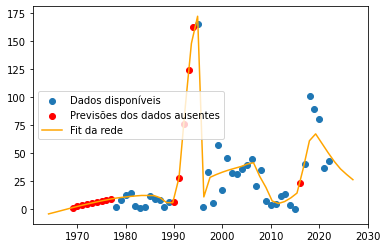

In [18]:
#Previsões
prev_geral =model.predict(anos_com_dados_norm)*pa_std + pa_media
prev_ausentes = model.predict(aspa_normalizado)*pa_std + pa_media

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca_art,label='Dados disponíveis')
f1.scatter(anos_sem_pesca_art,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
p = p.reshape(50,1)
y = model.predict(p)*pa_std + pa_media
f1.plot(p*ano_std + ano_media,y,color='orange',label='Fit da rede')


#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

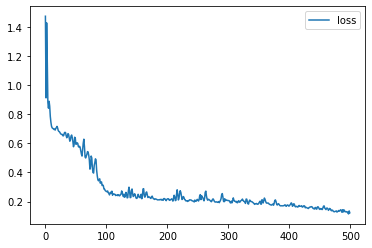

In [19]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()